#Supermart Grocery Sales - Retail Analytics Dataset
Mustafiz Ahmed UMID05072548678

In [1]:
# Mounting my Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries I need for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading my dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/UM_Supermarket_Grocery_Sales/supermarket.csv')

# Taking a quick look at the first few rows
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
# Checking the shape of my dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print()

# Getting info about data types and missing values
df.info()

Dataset has 9994 rows and 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
# Converting Order Date from text to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='ignore')

# Checking for any duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Verifying the date conversion worked
print()
df.info()

Number of duplicate rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


/tmp/ipython-input-3282741696.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='ignore')


In [6]:
# Converting Order Date with mixed format handling
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

# Checking the conversion
print("Order Date converted successfully")
print()
df.info()

Order Date converted successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [7]:
# Extracting month number, month name, and year from Order Date
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year

# Checking the new columns
df[['Order Date', 'month_no', 'Month', 'year']].head(10)

,Order Date,month_no,Month,year
0,2017-08-11,8,August,2017
1,2017-08-11,8,August,2017
2,2017-12-06,12,December,2017
3,2016-11-10,11,November,2016
4,2016-11-10,11,November,2016
5,2015-09-06,9,September,2015
6,2015-09-06,9,September,2015
7,2015-09-06,9,September,2015
8,2015-09-06,9,September,2015
9,2015-09-06,9,September,2015


In [8]:
# Getting summary statistics for numerical columns
df[['Sales', 'Discount', 'Profit']].describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [9]:
# Checking unique values in key categorical columns
print(f"Categories: {df['Category'].nunique()}")
print(df['Category'].unique())
print()

print(f"Regions: {df['Region'].nunique()}")
print(df['Region'].unique())
print()

print(f"Cities: {df['City'].nunique()}")
print(f"Years: {df['year'].unique()}")

Categories: 7
['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']

Regions: 5
['North' 'South' 'West' 'Central' 'East']

Cities: 24
Years: [2017 2016 2015 2018]


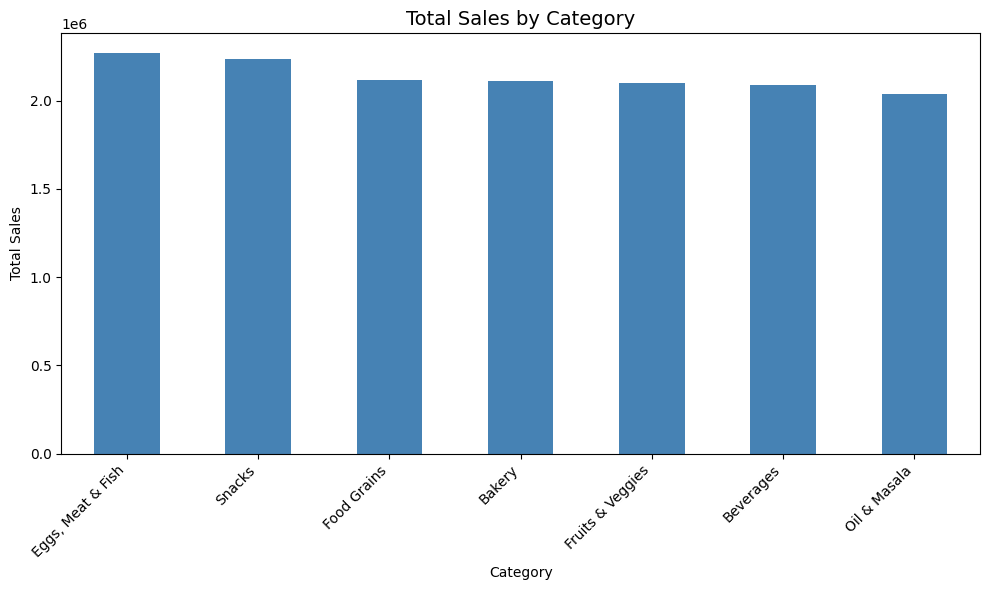

Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64


In [10]:
# Calculating total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Showing the actual numbers
print(sales_by_category)

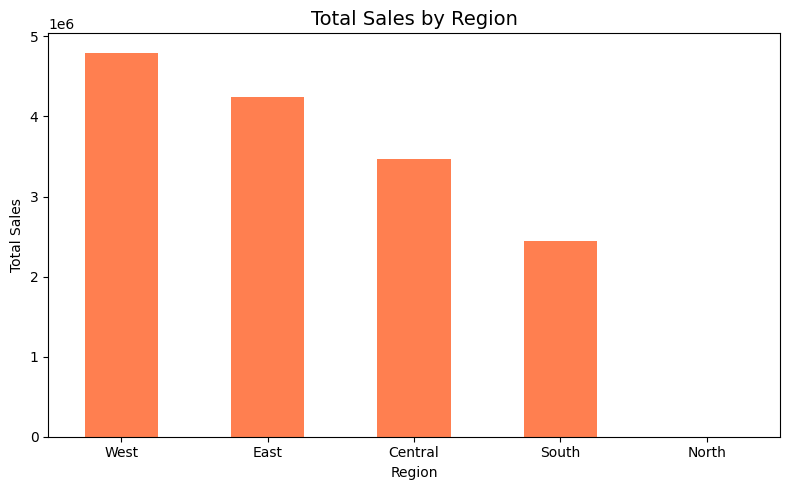

Region
West       4798743
East       4248368
Central    3468156
South      2440461
North         1254
Name: Sales, dtype: int64


In [11]:
# Calculating total sales for each region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color='coral')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Showing the actual numbers
print(sales_by_region)

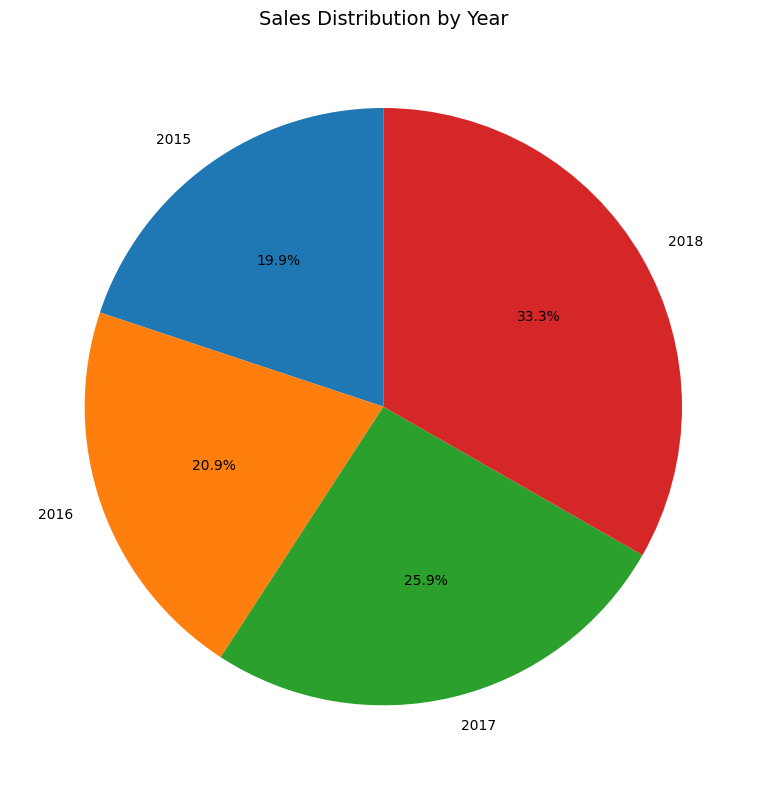

year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64


In [12]:
# Calculating total sales for each year
sales_by_year = df.groupby('year')['Sales'].sum().sort_values()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_year, labels=sales_by_year.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Year', fontsize=14)
plt.tight_layout()
plt.show()

# Showing the actual numbers
print(sales_by_year)

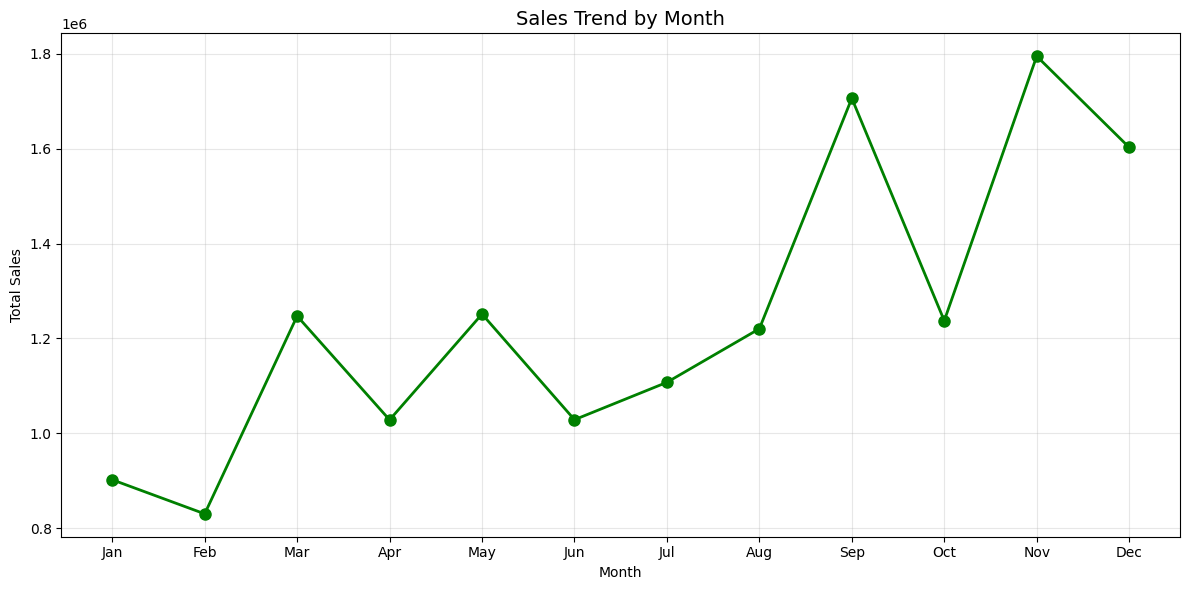

month_no
1      902128
2      830301
3     1247196
4     1028352
5     1251327
6     1028694
7     1107483
8     1220430
9     1706141
10    1237389
11    1794831
12    1602710
Name: Sales, dtype: int64


In [13]:
# Calculating total sales for each month
sales_by_month = df.groupby('month_no')['Sales'].sum()

# Creating a line plot
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o', linewidth=2, markersize=8, color='green')
plt.title('Sales Trend by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Showing the actual numbers
print(sales_by_month)

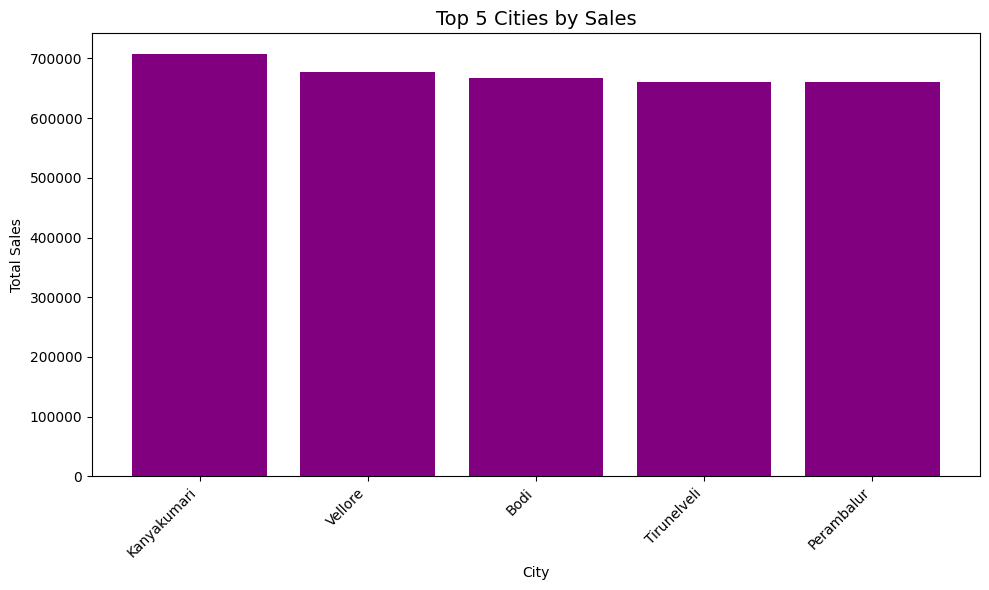

City
Kanyakumari    706764
Vellore        676550
Bodi           667177
Tirunelveli    659812
Perambalur     659738
Name: Sales, dtype: int64


In [14]:
# Calculating total sales per city and getting top 5
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values, color='purple')
plt.title('Top 5 Cities by Sales', fontsize=14)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Showing the actual numbers
print(top_cities)

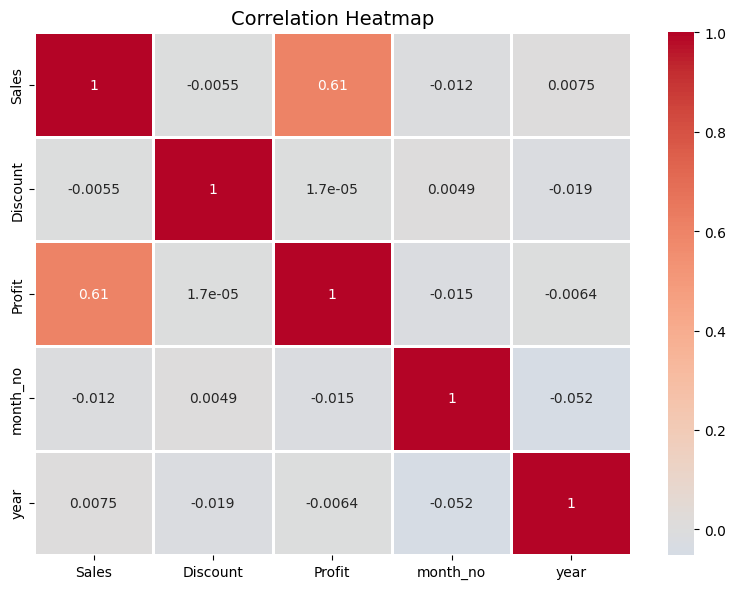

In [15]:
# Selecting only numerical columns for correlation
numerical_cols = df[['Sales', 'Discount', 'Profit', 'month_no', 'year']]

# Calculating correlation matrix
correlation = numerical_cols.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

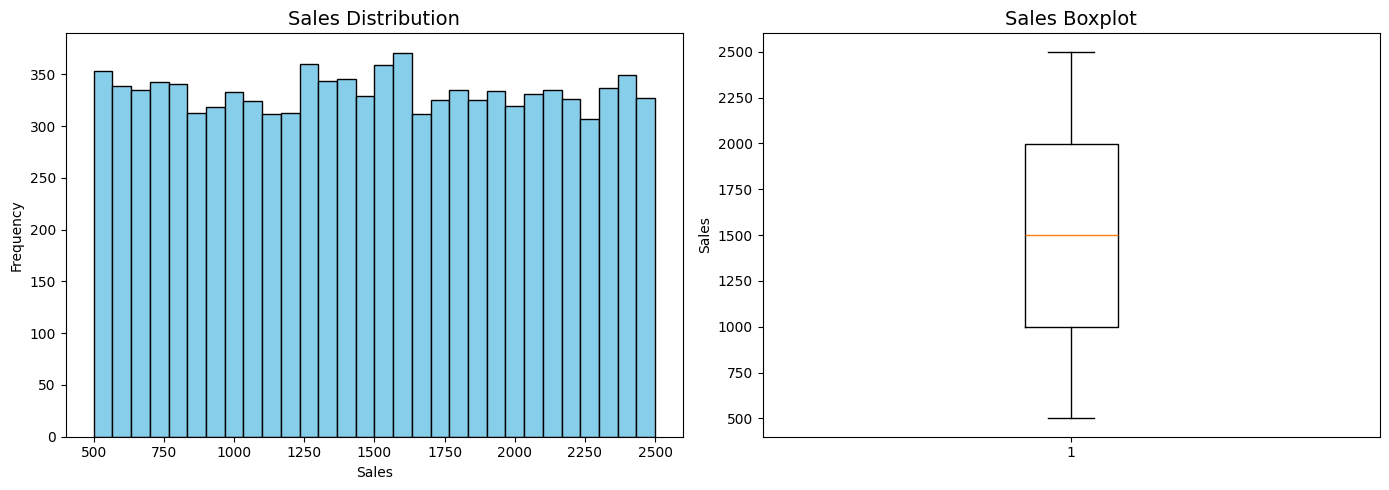

Mean Sales: 1496.60
Median Sales: 1498.00


In [16]:
# Creating subplots for histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Sales'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Sales Distribution', fontsize=14)
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(df['Sales'], vert=True)
axes[1].set_title('Sales Boxplot', fontsize=14)
axes[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

# Basic stats
print(f"Mean Sales: {df['Sales'].mean():.2f}")
print(f"Median Sales: {df['Sales'].median():.2f}")

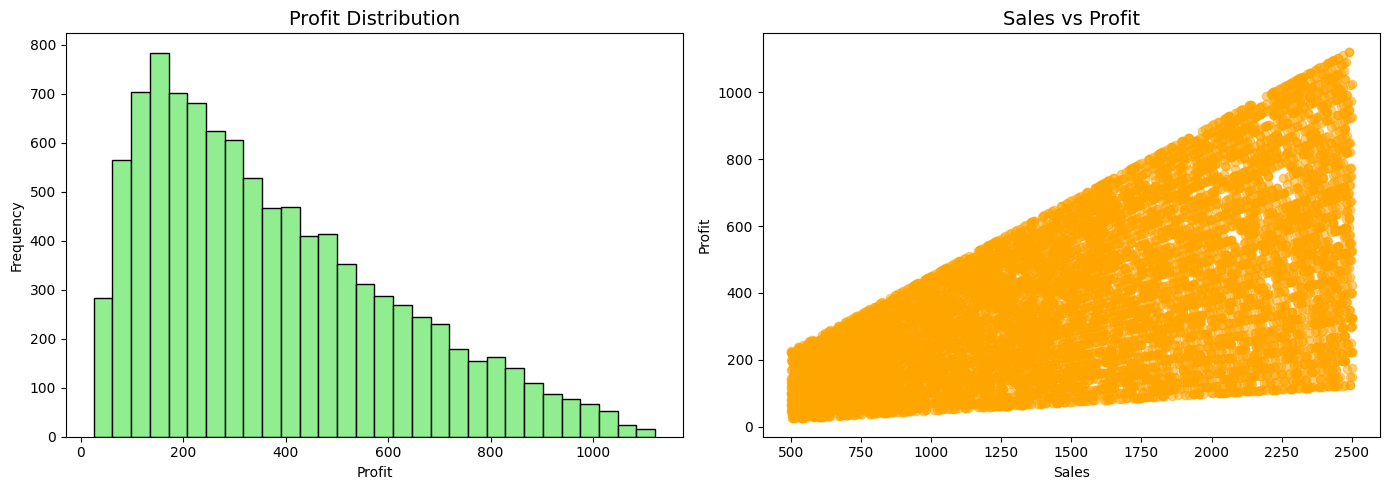

Mean Profit: 374.94
Total Profit: 3747121.20


In [17]:
# Creating subplots for profit analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Profit distribution
axes[0].hist(df['Profit'], bins=30, color='lightgreen', edgecolor='black')
axes[0].set_title('Profit Distribution', fontsize=14)
axes[0].set_xlabel('Profit')
axes[0].set_ylabel('Frequency')

# Scatter plot: Sales vs Profit
axes[1].scatter(df['Sales'], df['Profit'], alpha=0.5, color='orange')
axes[1].set_title('Sales vs Profit', fontsize=14)
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')

plt.tight_layout()
plt.show()

# Basic profit stats
print(f"Mean Profit: {df['Profit'].mean():.2f}")
print(f"Total Profit: {df['Profit'].sum():.2f}")

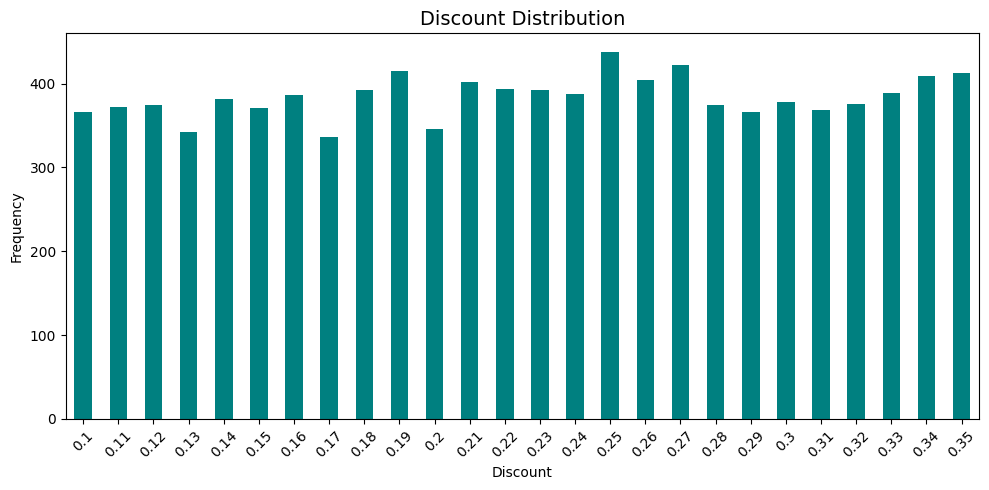

Average Profit by Discount Level:
Discount
0.10    361.888415
0.11    380.764704
0.12    362.944667
0.13    396.233538
0.14    374.307375
0.15    373.710755
0.16    383.132176
0.17    378.569196
0.18    362.008469
0.19    371.424337
0.20    371.051561
0.21    374.613532
0.22    364.278092
0.23    387.924847
0.24    364.504703
0.25    375.752215
0.26    387.902178
0.27    384.061825
0.28    379.326979
0.29    389.692104
0.30    358.564735
0.31    376.786721
0.32    394.203590
0.33    372.934859
0.34    360.730660
0.35    364.360460
Name: Profit, dtype: float64


In [18]:
# Discount distribution
plt.figure(figsize=(10, 5))
df['Discount'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Discount Distribution', fontsize=14)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average profit by discount level
profit_by_discount = df.groupby('Discount')['Profit'].mean().sort_index()
print("Average Profit by Discount Level:")
print(profit_by_discount)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataframe for modeling
df_model = df.copy()

# Initializing label encoder
le = LabelEncoder()

# Encoding categorical columns
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Checking the encoded data
print("Encoded categorical columns:")
df_model[['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']].head(10)

Encoded categorical columns:


,Category,Sub Category,City,Region,State,Month
0,5,14,21,2,0,1
1,1,13,8,3,0,1
2,3,0,13,4,0,2
3,4,12,4,3,0,9
4,3,18,12,3,0,9
5,3,18,4,4,0,11
6,4,12,20,4,0,11
7,4,11,15,4,0,11
8,0,1,19,4,0,11
9,0,3,1,4,0,11


In [20]:
# Selecting features for the model
features = df_model[['Category', 'Sub Category', 'City', 'Region', 'Discount', 'Profit', 'month_no', 'year']]
target = df_model['Sales']

# Checking the shapes
print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")
print()
print("First few rows of features:")
print(features.head())

Features shape: (9994, 8)
Target shape: (9994,)

First few rows of features:
   Category  Sub Category  City  Region  Discount  Profit  month_no  year
0         5            14    21       2      0.12  401.28         8  2017
1         1            13     8       3      0.18  149.80         8  2017
2         3             0    13       4      0.21  165.20        12  2017
3         4            12     4       3      0.25   89.60        11  2016
4         3            18    12       3      0.26  918.45        11  2016


In [21]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Checking the sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 7995 samples
Testing set size: 1999 samples


In [22]:
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler = StandardScaler()

# Fitting on training data and transforming both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Features scaled successfully
Training set shape: (7995, 8)
Testing set shape: (1999, 8)


In [23]:
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train_scaled, y_train)

# Making predictions on test set
y_pred = model.predict(X_test_scaled)

print("Model trained successfully")
print(f"Number of predictions: {len(y_pred)}")

Model trained successfully
Number of predictions: 1999


In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score: {r2:.4f}")

Model Performance Metrics:
Mean Squared Error (MSE): 213058.77
Root Mean Squared Error (RMSE): 461.58
Mean Absolute Error (MAE): 379.27
R-squared Score: 0.3540


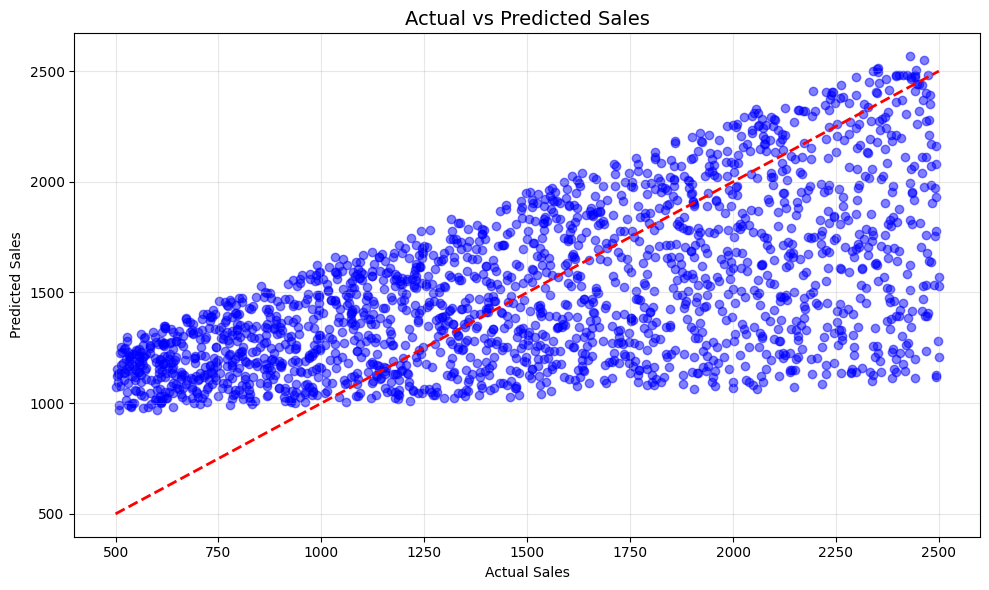

Sample Predictions:
   Actual    Predicted
0     523  1141.965262
1    1301  1525.537577
2    1154  1132.122512
3    2045  2220.213021
4     639  1183.972636
5    1121  1292.437539
6    1229  1210.229741
7    1379  1349.764028
8    1953  2028.941525
9     596  1014.207169


In [25]:
# Creating a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Sales', fontsize=14)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Showing some sample predictions
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print("Sample Predictions:")
print(comparison)

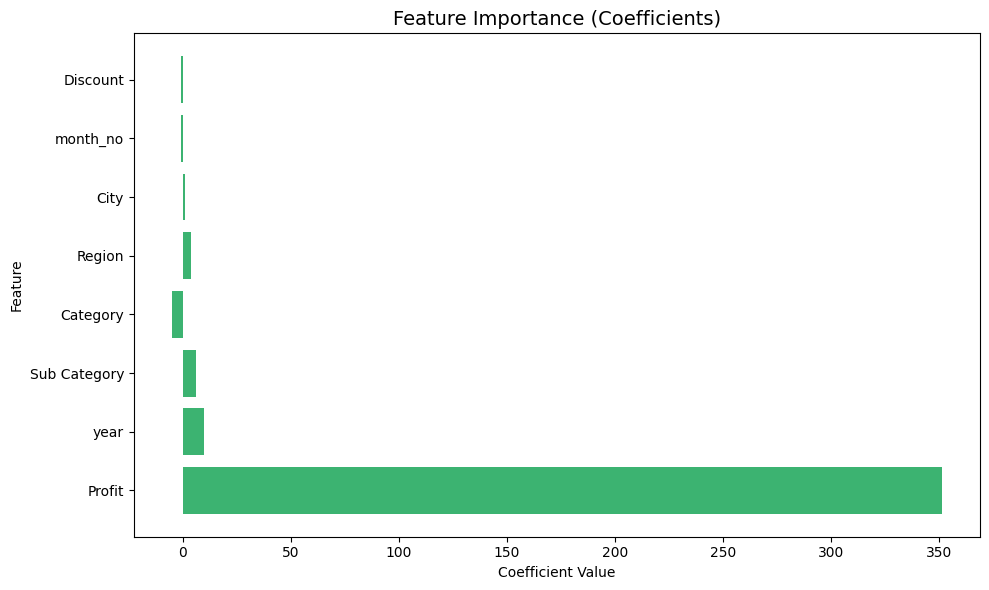

Feature Importance:
        Feature  Coefficient
5        Profit   351.302036
7          year     9.941534
1  Sub Category     6.298107
0      Category    -4.878302
3        Region     3.602064
2          City     1.084478
6      month_no    -1.037850
4      Discount    -0.776326


In [26]:
# Getting feature coefficients from the model
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='mediumseagreen')
plt.title('Feature Importance (Coefficients)', fontsize=14)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature Importance:")
print(feature_importance)

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initializing Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest model trained successfully")

Random Forest model trained successfully


In [28]:
# Calculating evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Displaying the results
print("Random Forest Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared Score: {r2_rf:.4f}")
print()

# Comparing with Linear Regression
print("Comparison with Linear Regression:")
print(f"Linear Regression R2: {r2:.4f}")
print(f"Random Forest R2: {r2_rf:.4f}")
print(f"Improvement: {(r2_rf - r2):.4f}")

Random Forest Model Performance:
Mean Squared Error (MSE): 212393.05
Root Mean Squared Error (RMSE): 460.86
Mean Absolute Error (MAE): 377.81
R-squared Score: 0.3560

Comparison with Linear Regression:
Linear Regression R2: 0.3540
Random Forest R2: 0.3560
Improvement: 0.0020


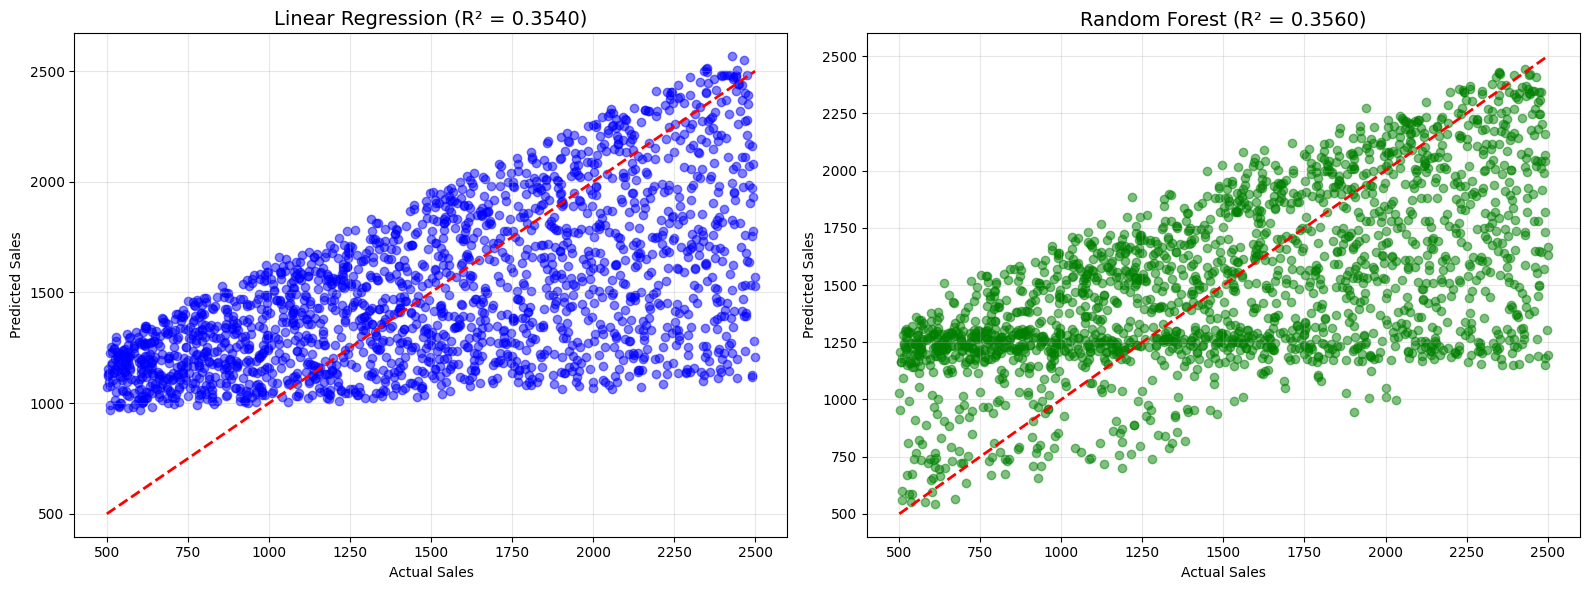

In [29]:
# Creating side-by-side comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression plot
axes[0].scatter(y_test, y_pred, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0].set_title(f'Linear Regression (R² = {r2:.4f})', fontsize=14)
axes[0].set_xlabel('Actual Sales')
axes[0].set_ylabel('Predicted Sales')
axes[0].grid(True, alpha=0.3)

# Random Forest plot
axes[1].scatter(y_test, y_pred_rf, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1].set_title(f'Random Forest (R² = {r2_rf:.4f})', fontsize=14)
axes[1].set_xlabel('Actual Sales')
axes[1].set_ylabel('Predicted Sales')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

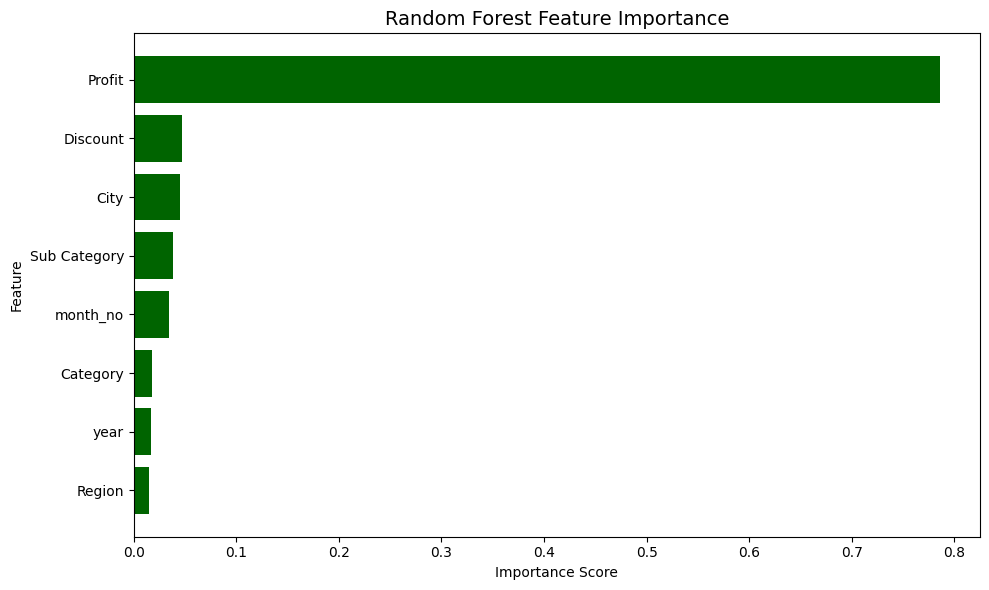

Feature Importance Rankings:
        Feature  Importance
5        Profit    0.785781
4      Discount    0.047052
2          City    0.045248
1  Sub Category    0.038024
6      month_no    0.033858
0      Category    0.018053
7          year    0.016658
3        Region    0.015326


In [30]:
# Getting feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='darkgreen')
plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Feature Importance Rankings:")
print(rf_feature_importance)

In [31]:
# Creating a summary report
print("="*60)
print("SUPERMARKET SALES ANALYSIS - FINAL SUMMARY")
print("="*60)
print()

print("Dataset Overview:")
print(f"  - Total Records: {df.shape[0]}")
print(f"  - Time Period: {df['year'].min()} to {df['year'].max()}")
print(f"  - Categories: {df['Category'].nunique()}")
print(f"  - Cities: {df['City'].nunique()}")
print()

print("Business Insights:")
print(f"  - Total Sales: ${df['Sales'].sum():,.2f}")
print(f"  - Total Profit: ${df['Profit'].sum():,.2f}")
print(f"  - Average Order Value: ${df['Sales'].mean():.2f}")
print(f"  - Average Profit per Order: ${df['Profit'].mean():.2f}")
print()

print("Top Performing:")
top_category = df.groupby('Category')['Sales'].sum().idxmax()
top_region = df.groupby('Region')['Sales'].sum().idxmax()
best_month = df.groupby('month_no')['Sales'].sum().idxmax()
print(f"  - Best Category: {top_category}")
print(f"  - Best Region: {top_region}")
print(f"  - Best Month: {best_month}")
print()

print("Machine Learning Results:")
print(f"  - Linear Regression R²: {r2:.4f}")
print(f"  - Random Forest R²: {r2_rf:.4f}")
print(f"  - Most Important Feature: Profit (78.6% importance)")
print()

print("Recommendations:")
print("  1. Focus on high-profit items to boost sales")
print("  2. Invest more in Eggs, Meat & Fish category")
print("  3. Strengthen presence in West and East regions")
print("  4. Plan promotions for September and November peaks")
print("="*60)

SUPERMARKET SALES ANALYSIS - FINAL SUMMARY

Dataset Overview:
  - Total Records: 9994
  - Time Period: 2015 to 2018
  - Categories: 7
  - Cities: 24

Business Insights:
  - Total Sales: $14,956,982.00
  - Total Profit: $3,747,121.20
  - Average Order Value: $1496.60
  - Average Profit per Order: $374.94

Top Performing:
  - Best Category: Eggs, Meat & Fish
  - Best Region: West
  - Best Month: 11

Machine Learning Results:
  - Linear Regression R²: 0.3540
  - Random Forest R²: 0.3560
  - Most Important Feature: Profit (78.6% importance)

Recommendations:
  1. Focus on high-profit items to boost sales
  2. Invest more in Eggs, Meat & Fish category
  3. Strengthen presence in West and East regions
  4. Plan promotions for September and November peaks


In [32]:
import pickle

# Saving the Random Forest model
with open('rf_sales_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Saving the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Models saved successfully!")
print("  - rf_sales_model.pkl (Random Forest model)")
print("  - scaler.pkl (Feature scaler)")
print()
print("You can load these models later using:")
print("  model = pickle.load(open('rf_sales_model.pkl', 'rb'))")
print("  scaler = pickle.load(open('scaler.pkl', 'rb'))")

Models saved successfully!
  - rf_sales_model.pkl (Random Forest model)
  - scaler.pkl (Feature scaler)

You can load these models later using:
  model = pickle.load(open('rf_sales_model.pkl', 'rb'))
  scaler = pickle.load(open('scaler.pkl', 'rb'))
